In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Membaca file dari Google Drive
df = pd.read_csv('/content/sample_data/Food_Delivery_Times.csv')

In [ ]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


##DATA PREPROCESSING##

In [ ]:
# Fungsi untuk menghitung persentase missing values
def missing_values_percentage(df):
    missing_values = df.isnull().sum()
    total_values = len(df)
    missing_percentage = (missing_values / total_values) * 100
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Menghitung dan menampilkan persentase missing values untuk setiap DataFrame
missing_info_combined = missing_values_percentage(df)

print("Missing Values Info for df:")
print(missing_info_combined)

Missing Values Info for df:
                        Missing Values  Percentage
Order_ID                             0         0.0
Distance_km                          0         0.0
Weather                             30         3.0
Traffic_Level                       30         3.0
Time_of_Day                         30         3.0
Vehicle_Type                         0         0.0
Preparation_Time_min                 0         0.0
Courier_Experience_yrs              30         3.0
Delivery_Time_min                    0         0.0


In [ ]:
for column in ['Weather', 'Traffic_Level', 'Time_of_Day', 'Courier_Experience_yrs']:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-286-dbd28b6c75bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
# Fungsi untuk menghitung persentase missing values
def missing_values_percentage(df):
    missing_values = df.isnull().sum()
    total_values = len(df)
    missing_percentage = (missing_values / total_values) * 100
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Menghitung dan menampilkan persentase missing values untuk setiap DataFrame
missing_info_combined = missing_values_percentage(df)

print("Missing Values Info for df1:")
print(missing_info_combined)

Missing Values Info for df1:
                        Missing Values  Percentage
Order_ID                             0         0.0
Distance_km                          0         0.0
Weather                              0         0.0
Traffic_Level                        0         0.0
Time_of_Day                          0         0.0
Vehicle_Type                         0         0.0
Preparation_Time_min                 0         0.0
Courier_Experience_yrs               0         0.0
Delivery_Time_min                    0         0.0


In [ ]:
#duplicate checking
df.duplicated().sum()

np.int64(0)

In [ ]:
jumlah_data = len(df)
print(f"Jumlah total data dalam df adalah: {jumlah_data}")

Jumlah total data dalam df adalah: 1000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


##NORMALIZATION##

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']] = scaler.fit_transform(
    df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']]
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   float64
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


##EDA

In [ ]:
print("\n--- Statistik Deskriptif Variabel Numerik ---")
print(df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].describe())


--- Statistik Deskriptif Variabel Numerik ---
       Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000            1000.00000             1000.000000   
mean      0.488143               0.49925                0.513556   
std       0.293642               0.30019                0.320058   
min       0.000000               0.00000                0.000000   
25%       0.232732               0.25000                0.222222   
50%       0.494845               0.50000                0.555556   
75%       0.743686               0.75000                0.777778   
max       1.000000               1.00000                1.000000   

       Delivery_Time_min  
count        1000.000000  
mean            0.336083  
std             0.152213  
min             0.000000  
25%             0.227586  
50%             0.327586  
75%             0.434483  
max             1.000000  


In [ ]:
print("\n--- Distribusi Frekuensi Variabel Kategorikal ---")
for col in ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']:
    print(f"\nDistribusi untuk kolom '{col}':")
    print(df[col].value_counts(normalize=True))


--- Distribusi Frekuensi Variabel Kategorikal ---

Distribusi untuk kolom 'Weather':
Weather
Clear    0.500
Rainy    0.204
Foggy    0.103
Snowy    0.097
Windy    0.096
Name: proportion, dtype: float64

Distribusi untuk kolom 'Traffic_Level':
Traffic_Level
Medium    0.420
Low       0.383
High      0.197
Name: proportion, dtype: float64

Distribusi untuk kolom 'Time_of_Day':
Time_of_Day
Morning      0.338
Evening      0.293
Afternoon    0.284
Night        0.085
Name: proportion, dtype: float64

Distribusi untuk kolom 'Vehicle_Type':
Vehicle_Type
Bike       0.503
Scooter    0.302
Car        0.195
Name: proportion, dtype: float64


In [ ]:
if 'Delivery_Time_min' not in df.columns:
    print("Kolom 'Delivery_Time_min' tidak ditemukan dalam DataFrame.")
else:
    # 1. Statistik Deskriptif
    print("Statistik Deskriptif untuk Waktu Pengiriman (menit):\n", df['Delivery_Time_min'].describe())

Statistik Deskriptif untuk Waktu Pengiriman (menit):
 count    1000.000000
mean        0.336083
std         0.152213
min         0.000000
25%         0.227586
50%         0.327586
75%         0.434483
max         1.000000
Name: Delivery_Time_min, dtype: float64


In [ ]:
    # Menghitung Skewness dan Kurtosis
    skewness = df['Delivery_Time_min'].skew()
    kurtosis = df['Delivery_Time_min'].kurt()
    print(f"\nSkewness Waktu Pengiriman: {skewness:.2f}")
    print(f"Kurtosis Waktu Pengiriman: {kurtosis:.2f}")


Skewness Waktu Pengiriman: 0.51
Kurtosis Waktu Pengiriman: 0.29


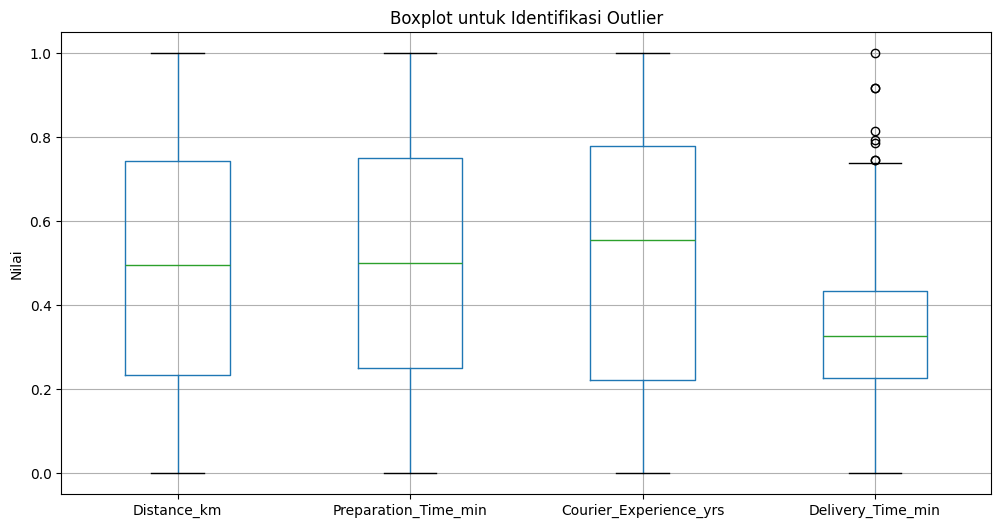

In [ ]:
# --- Identifikasi Outlier (Boxplot) ---
plt.figure(figsize=(12, 6))
df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].boxplot()
plt.title('Boxplot untuk Identifikasi Outlier')
plt.ylabel('Nilai')
plt.show()

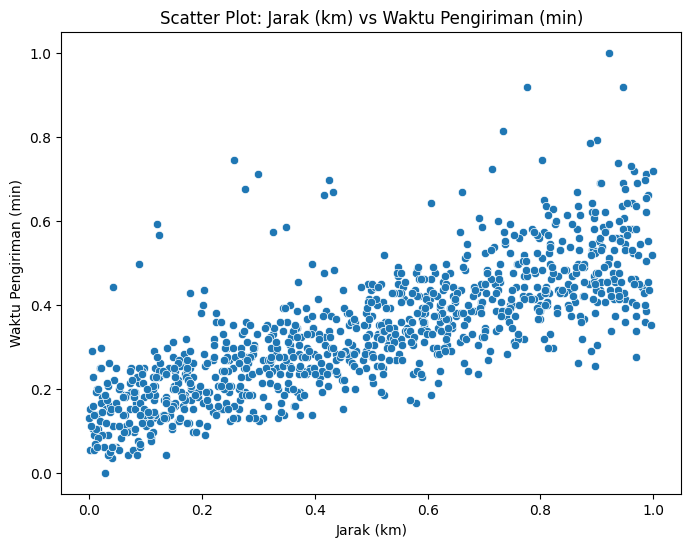

In [ ]:
# --- Visualisasi Hubungan Antar Variabel ---

# Scatter Plot: Jarak vs Waktu Pengiriman
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=df)
plt.title('Scatter Plot: Jarak (km) vs Waktu Pengiriman (min)')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Pengiriman (min)')
plt.show()

In [ ]:
# --- Korelasi dengan Target Variabel ---
numerical_df = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']]
correlation_with_delivery_time = numerical_df.corr()['Delivery_Time_min'].sort_values(ascending=False)
print("\nCorrelation with Delivery_Time_min:")
print(correlation_with_delivery_time)


Correlation with Delivery_Time_min:
Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Courier_Experience_yrs   -0.088996
Name: Delivery_Time_min, dtype: float64


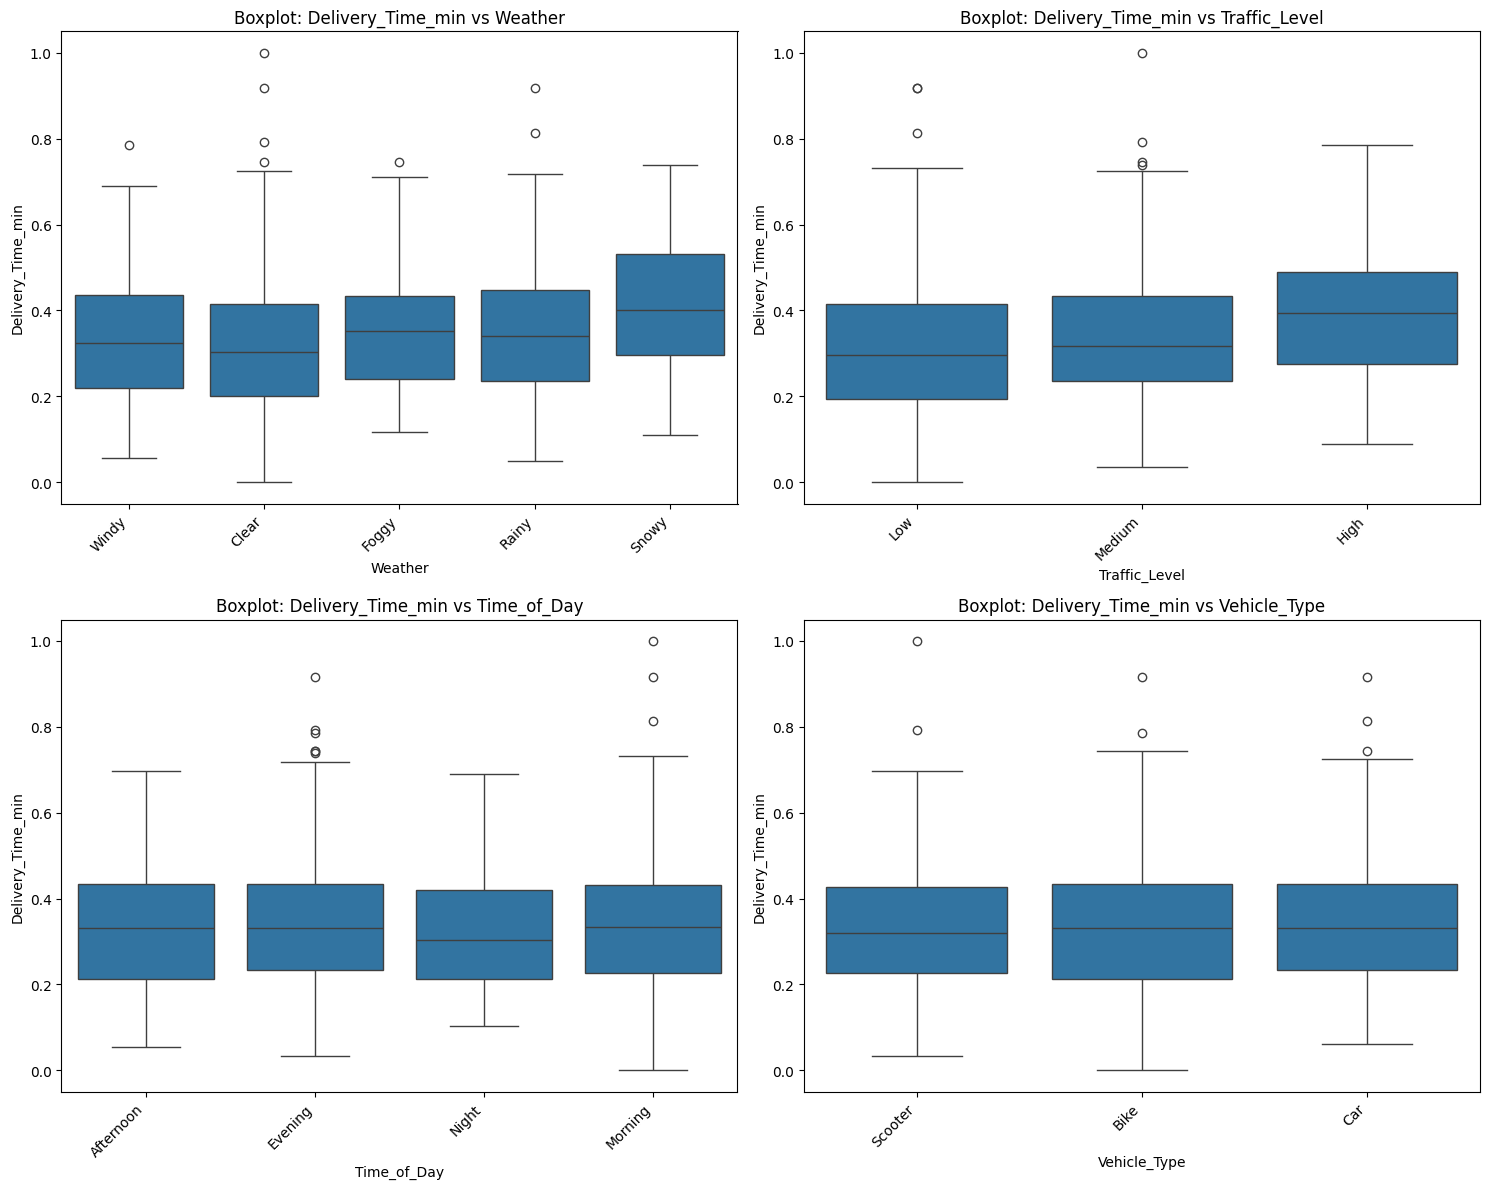

In [ ]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 cols
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='Delivery_Time_min', data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot: Delivery_Time_min vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Delivery_Time_min')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment('right')
plt.tight_layout()
plt.show()

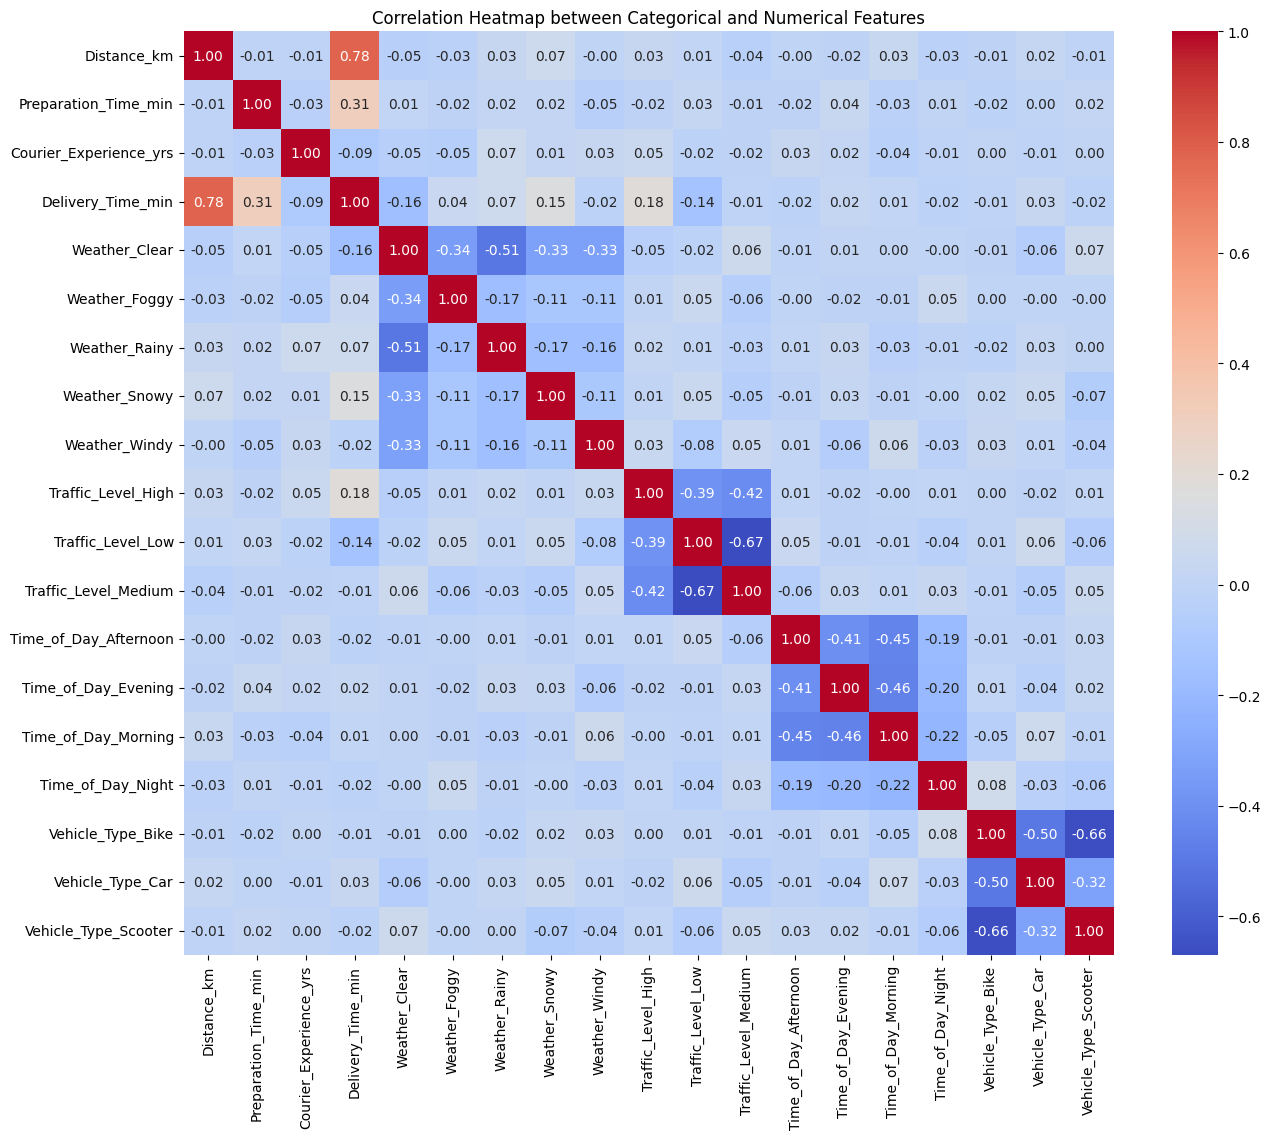

In [ ]:
# Define numerical and categorical columns
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Create a ColumnTransformer to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the data
df_processed = preprocessor.fit_transform(df)

# Get the feature names after One-Hot Encoding
encoded_cat_cols = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
all_cols = numerical_cols + encoded_cat_cols

# Convert the processed data to a DataFrame
df_processed = pd.DataFrame(df_processed, columns=all_cols)

# Calculate the correlation matrix
correlation_matrix = df_processed.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Categorical and Numerical Features')
plt.show()

##INSIGHT
- Correlation values range from -1 (strong negative) to +1 (strong positive)
- Distance and preparation time are the most impactful predictors of delivery time.
- External factors, including traffic and weather, also influence delivery performance, albeit to a lesser extent.


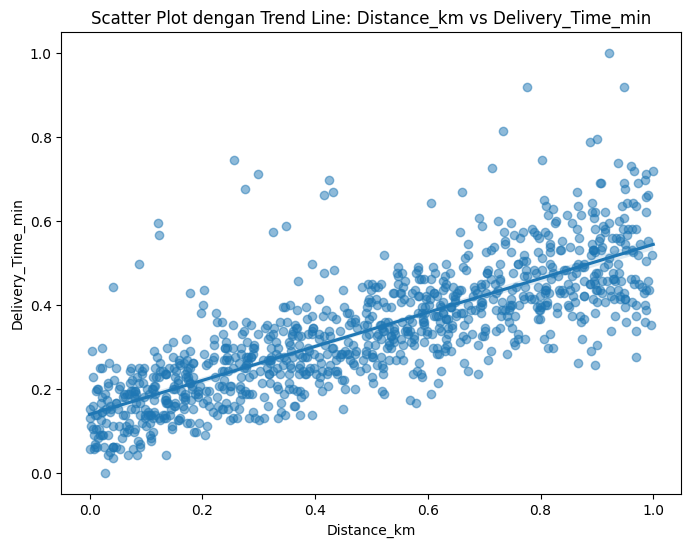

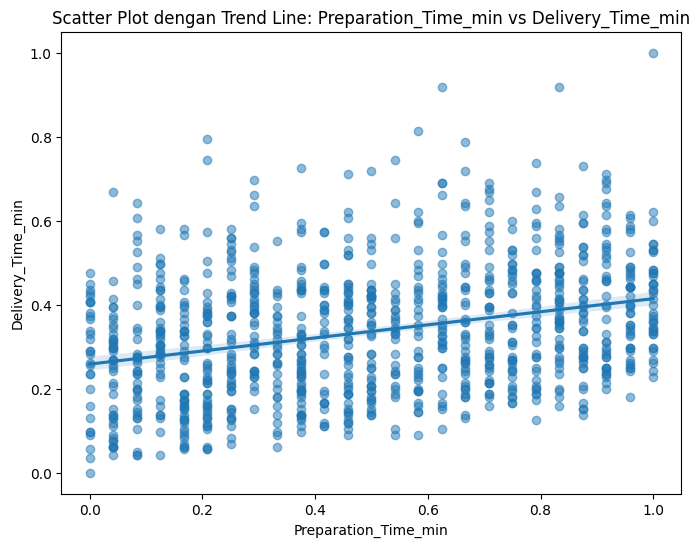

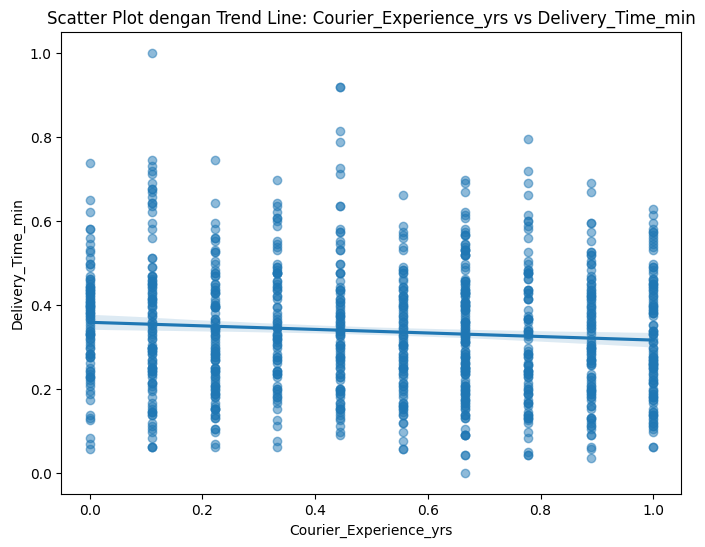

In [ ]:
# --- Visualisasi Fitur Numerik vs Target Variabel (Scatter Plot dengan Trend Line) ---
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=col, y='Delivery_Time_min', data=df, scatter_kws={'alpha':0.5})
    plt.title(f'Scatter Plot dengan Trend Line: {col} vs Delivery_Time_min')
    plt.xlabel(col)
    plt.ylabel('Delivery_Time_min')
    plt.show()

##INSIGHT
- Based on correlation with numeric columns:
Delivery_Time_min 1.000000
Distance_km 0.780998
Preparation_Time_min 0.307350
Courier_Experience_yrs -0.088996
Name: Delivery_Time_min, dtype: float64

- Distance (‘Distance_km’) shows a significant positive correlation with delivery time (‘Delivery_Time_min’).
- Preparation time (‘Preparation_Time_min’) also has a positive correlation with delivery time.
- Courier experience (‘Courier_Experience_yrs’) shows a weak negative correlation, which may indicate little influence on reducing delivery time.
- Weather conditions (‘Weather’), traffic level (‘Traffic_Level’), time of day (‘Time_of_Day’), and vehicle type (‘Vehicle_Type’) are categorical variables. Their influence on delivery time is visualized through boxplots, which show the differences in the distribution of delivery time between categories.
- Some outliers may exist in the numerical variables, which need to be investigated further.

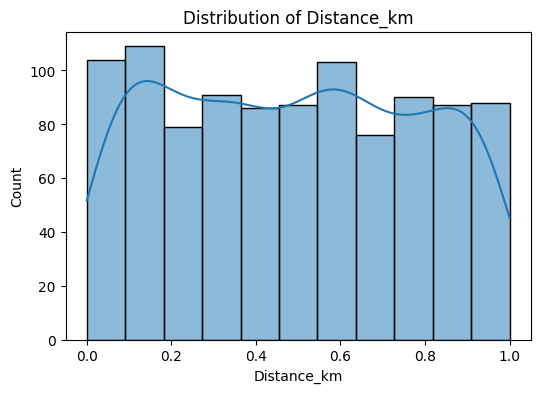

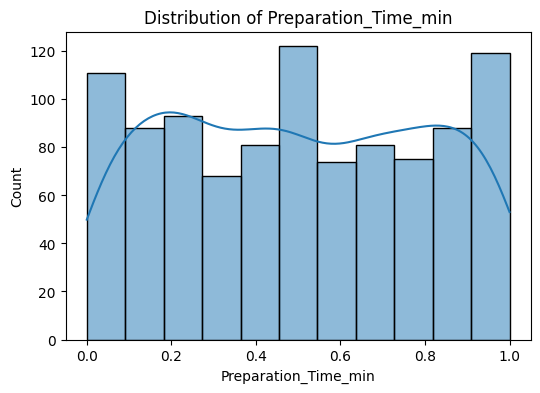

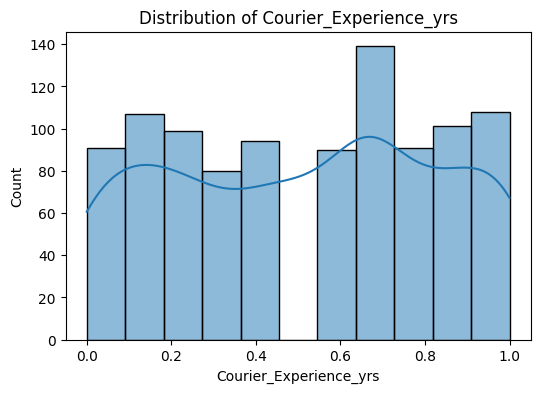

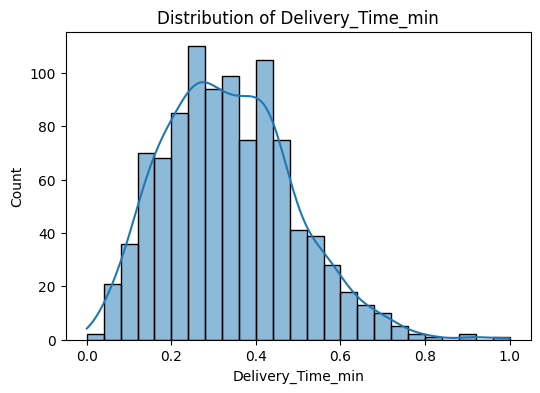

In [ ]:
# Distribution of numerical features
num_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

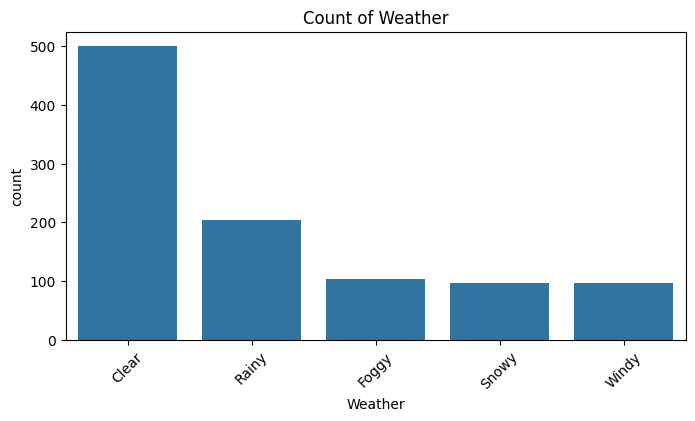

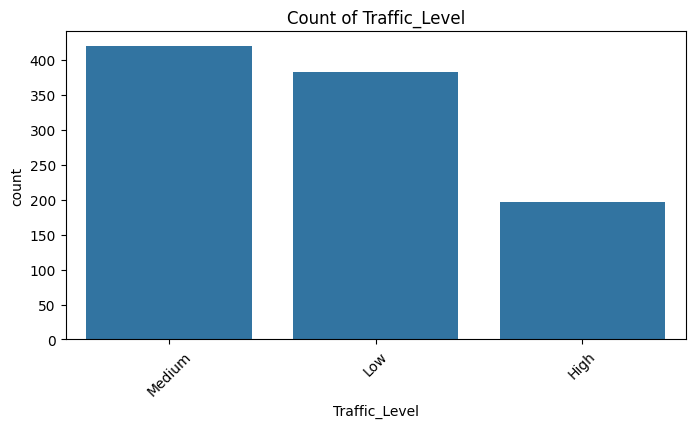

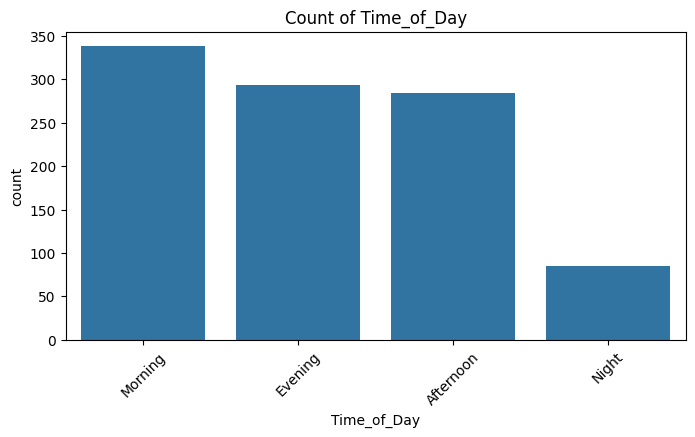

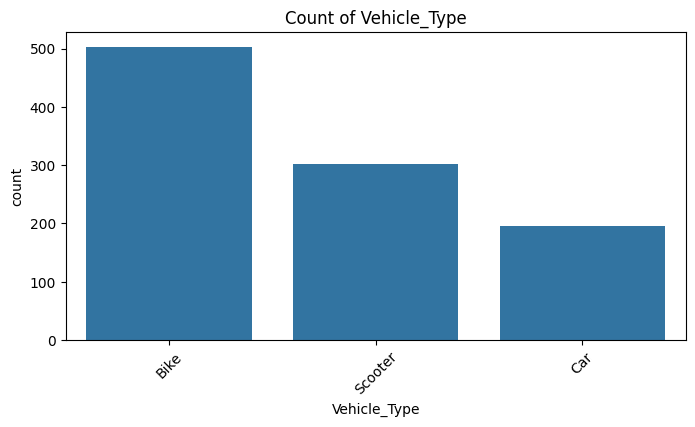

In [ ]:
# Distribution of categorical features
cat_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

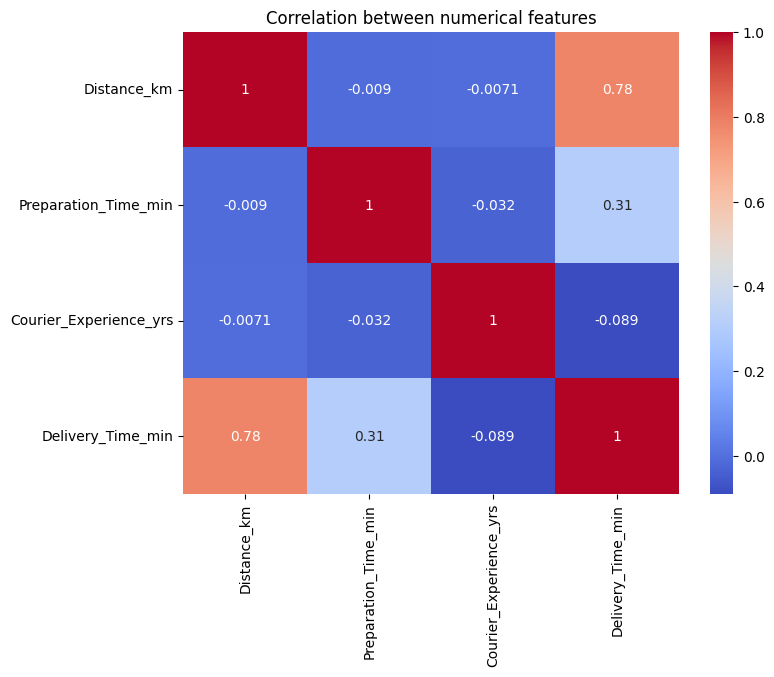

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()

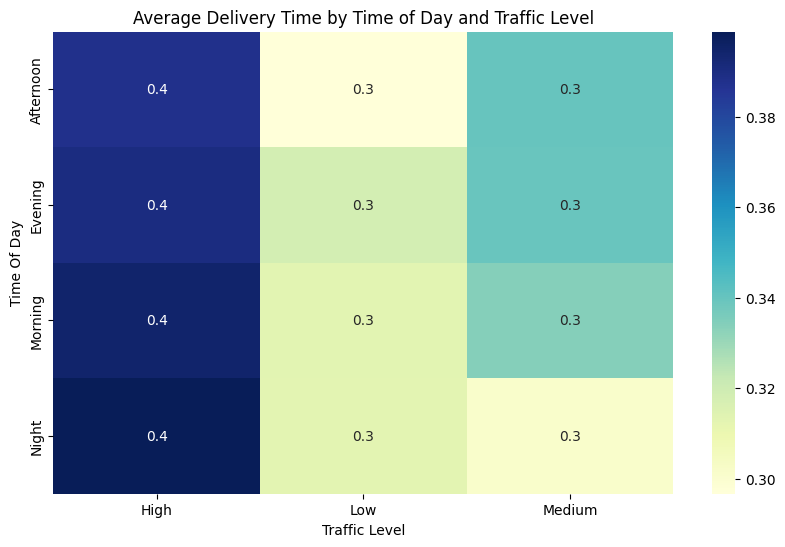

In [ ]:
# Rata-rata waktu pengiriman berdasarkan kombinasi Weather dan Traffic_Level
grouped_wt = df.groupby(['Time_of_Day', 'Traffic_Level'])['Delivery_Time_min'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_wt, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Delivery Time by Time of Day and Traffic Level')
plt.ylabel('Time Of Day')
plt.xlabel('Traffic Level')
plt.show()

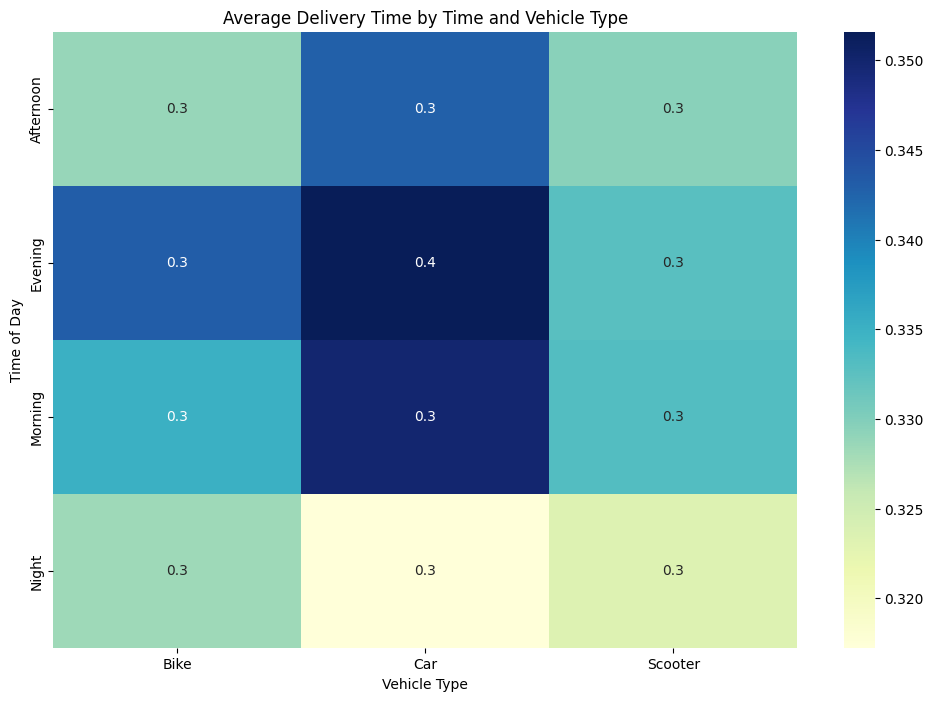

In [ ]:
# Rata-rata waktu pengiriman berdasarkan kombinasi Time_of_Day dan Vehicle_Type
grouped_tv = df.groupby(['Time_of_Day', 'Vehicle_Type'])['Delivery_Time_min'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_tv, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Delivery Time by Time and Vehicle Type')
plt.ylabel('Time of Day')
plt.xlabel('Vehicle Type')
plt.show()

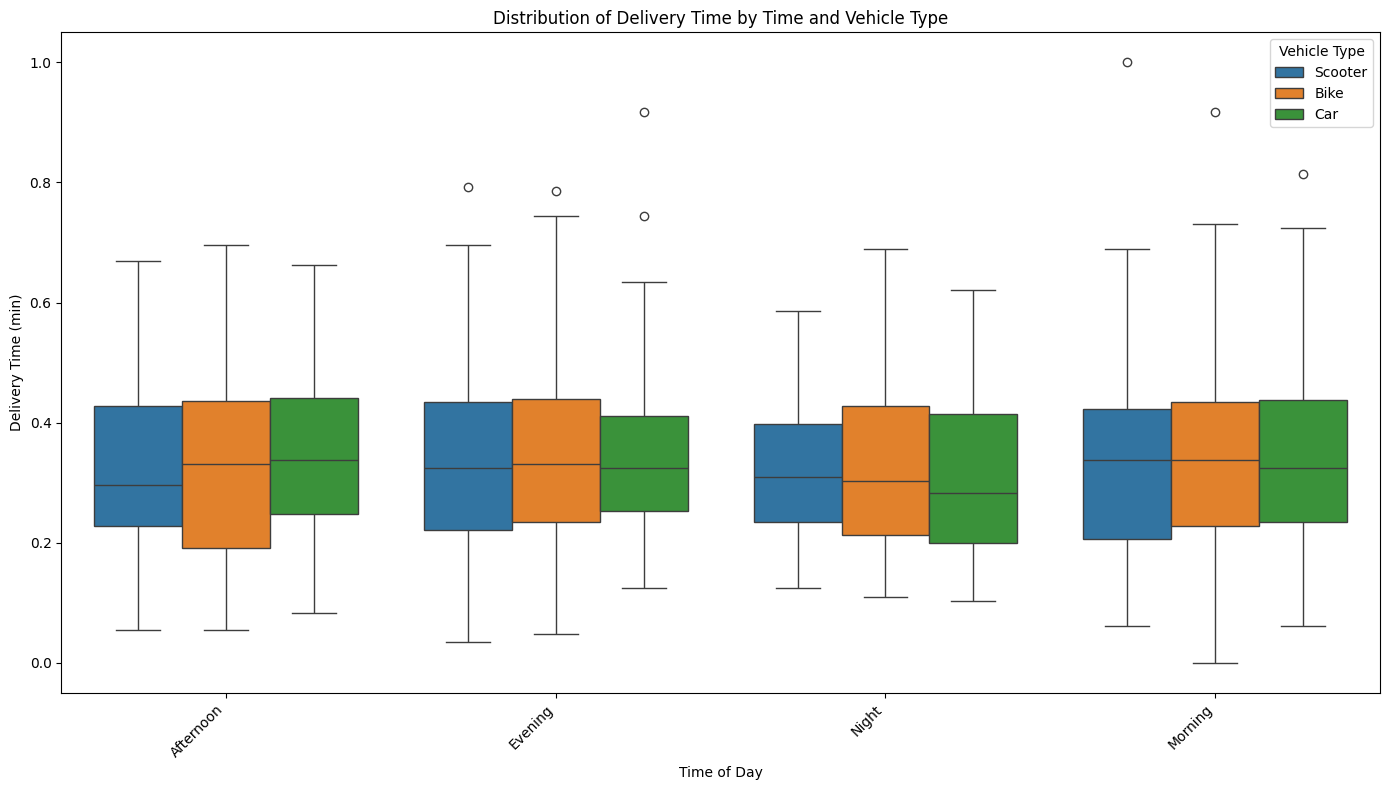

In [ ]:
# Distribusi Delivery_Time_min berdasarkan Time_of_Day dan Vehicle_Type
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Time_of_Day', y='Delivery_Time_min', hue='Vehicle_Type')
plt.title('Distribution of Delivery Time by Time and Vehicle Type')
plt.xlabel('Time of Day')
plt.ylabel('Delivery Time (min)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

##MACHINE LEARNING##

##1.Training Data Sharing

In [ ]:
# 1. Define Features (X) and Target (y)
X = df.drop(['Order_ID', 'Delivery_Time_min'], axis=1)
y = df['Delivery_Time_min']

In [ ]:
# 2. Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Size X_train:", X_train.shape)
print("Size X_test:", X_test.shape)
print("Size y_train:", y_train.shape)
print("Size y_test:", y_test.shape)

Size X_train: (800, 7)
Size X_test: (200, 7)
Size y_train: (800,)
Size y_test: (200,)


In [ ]:
# 3. Identify Numerical and Categorical Features
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

In [ ]:
# 4. Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [ ]:
# 5. Define Model and Hyperparameter Grid
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

In [ ]:
# 6. Configure K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# 7. Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1)

In [ ]:
# Create Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', grid_search)])

In [ ]:
# 8. Train Pipeline with Grid Search
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance_km',
                                                   'Preparation_Time_min',
                                                   'Courier_Experience_yrs']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Weather', 'Traffic_Level',
                                                   'Time_of_Day',
                                                   'Vehicle_Type'])])),
                ('regressor',
                 GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                              estimator=RandomForestRegressor(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 5, 10, 15],
                                          'min_samples_leaf': [1, 3, 5],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 200, 300]},
                              scoring='neg_mean_squared_error', verbose=1))])

In [ ]:
# Initialize and Train Multiple Models using Pipeline
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', LinearRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', DecisionTreeRegressor(random_state=42))]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor(random_state=42))]),
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', xgb.XGBRegressor(random_state=42))])
}


results = {}
predictions = {

}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    predictions[name] = y_pred

In [ ]:
#Evaluate and Compare Models
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"  R-squared (R2): {metrics['R2']:.2f}")

Model Evaluation Results:

Model: Linear Regression
  Mean Absolute Error (MAE): 0.04
  Mean Squared Error (MSE): 0.00
  Root Mean Squared Error (RMSE): 0.06
  R-squared (R2): 0.83

Model: Decision Tree
  Mean Absolute Error (MAE): 0.07
  Mean Squared Error (MSE): 0.01
  Root Mean Squared Error (RMSE): 0.11
  R-squared (R2): 0.46

Model: Random Forest
  Mean Absolute Error (MAE): 0.05
  Mean Squared Error (MSE): 0.00
  Root Mean Squared Error (RMSE): 0.07
  R-squared (R2): 0.79

Model: XGBoost
  Mean Absolute Error (MAE): 0.05
  Mean Squared Error (MSE): 0.01
  Root Mean Squared Error (RMSE): 0.07
  R-squared (R2): 0.75


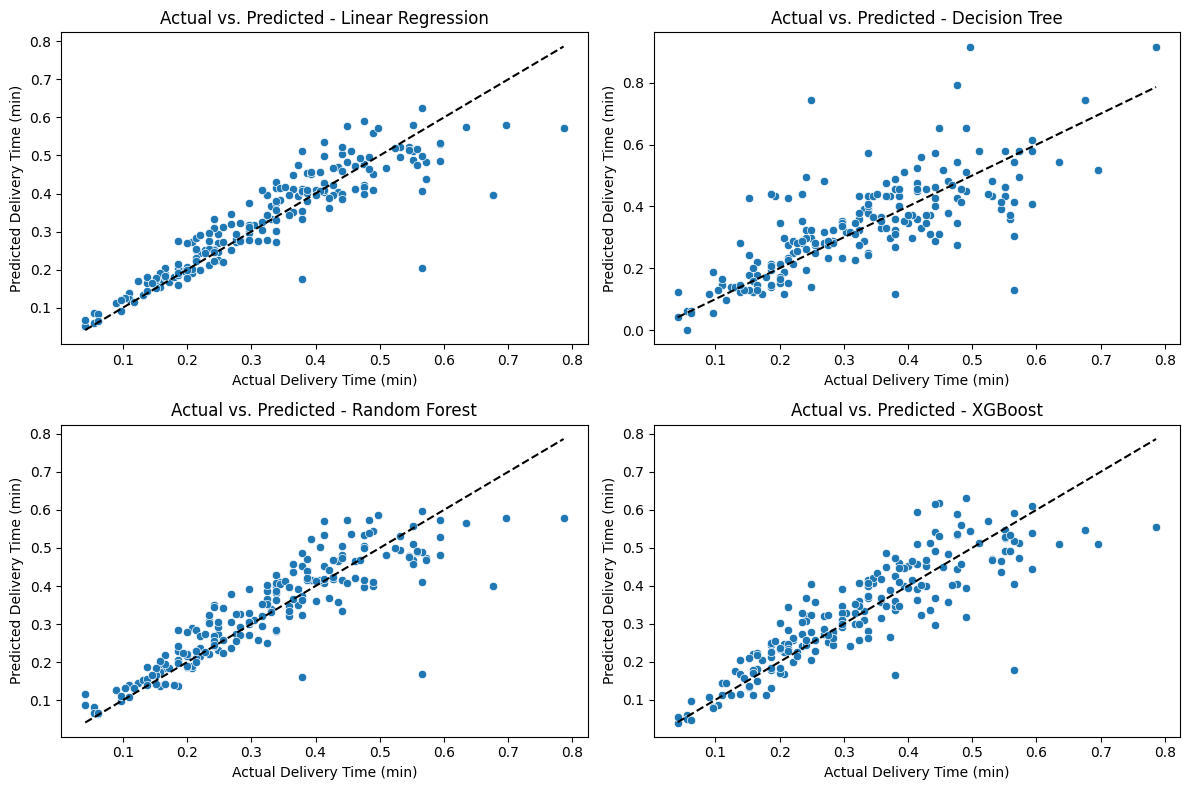

In [ ]:
# Visualization of Model Performance (Scatter Plot Actual vs. Predicted)
plt.figure(figsize=(12, 8))
for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Garis diagonal sempurna
    plt.xlabel('Actual Delivery Time (min)')
    plt.ylabel('Predicted Delivery Time (min)')
    plt.title(f'Actual vs. Predicted - {name}')
plt.tight_layout()
plt.show()

##INSIGHT
--- Steps for Model Development ---
1. **Data Loading and Preparation:** The dataset containing delivery information was loaded into a Pandas DataFrame.
2. **Feature and Target Definition:** 'Delivery_Time_min' was set as the target variable, and other relevant columns (excluding 'Order_ID') were used as features.
3. **Data Splitting:** The dataset was divided into training (80%) and test (20%) sets using `train_test_split`. The training set is used for model training and hyperparameter tuning, while the test set is held out for final model evaluation.
4. **Preprocessing:**
  - **Numerical Features:** 'Distance_km', 'Preparation_Time_min', and 'Courier_Experience_yrs' were scaled using StandardScaler to have zero mean and unit variance. This is important for many machine learning algorithms to perform optimally.
  - **Categorical Features:** 'Weather', 'Traffic_Level', 'Time_of_Day', and 'Vehicle_Type' were encoded using One-Hot Encoding to convert them into a numerical format suitable for the model. `handle_unknown='ignore'` ensures that the model doesn't fail if it encounters unseen categories during prediction.
  - A `ColumnTransformer` was created to apply these preprocessing steps to the appropriate columns. This allows for different preprocessing steps for numerical and categorical features within a single transformer.
5. **Model Definition and Hyperparameter Tuning:**
  - A Random Forest Regressor model was chosen for detailed hyperparameter tuning using `GridSearchCV` with 5-fold cross-validation. A `param_grid` was defined to search over different combinations of `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
  - Other base models (Linear Regression, Decision Tree, XGBoost) were also initialized for comparison.
6. **K-Fold Cross-Validation Configuration:**
  - K-Fold cross-validation (with k=5) was configured using `KFold`. This technique is used to estimate the model's performance on unseen data during hyperparameter tuning. The training data is split into 5 folds; the model is trained on 4 folds and evaluated on the remaining fold, and this process is repeated 5 times.
7. **Hyperparameter Tuning with GridSearchCV:**
  - `GridSearchCV` systematically searched the hyperparameter space for the Random Forest model, evaluating each combination using cross-validation and the negative Mean Squared Error as the scoring metric.
8. **Model Training with Pipeline:**
  - A `Pipeline` was used to combine the `ColumnTransformer` (for preprocessing) and the model (either directly or via `GridSearchCV` for the tuned Random Forest). This ensures that preprocessing steps are consistently applied during training and prediction.
  - Each model in the `models` dictionary was trained on the training data using its respective pipeline.
9. **Model Evaluation and Selection:**
  - Each trained model was evaluated on the held-out test set using MAE, MSE, RMSE, and R².
  - The model with the highest R-squared value on the test set was selected as the best performing model.
10. **Best Model Evaluation and Visualization:**
   - The best selected model was used to make predictions on the test set.
   - A scatter plot was generated to visualize the relationship between the actual and predicted delivery times for the best-performing model on the test set.

##PARAMETER TUNING

In [ ]:
print(X_train.columns)
print(type(X_train))

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [ ]:
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
if results:
    best_model_name = max(results, key=lambda k: results[k]['R2'])
    best_model_metrics = results[best_model_name]
    best_model_final = models[best_model_name]  # Access the model from the 'models' dictionary
    print(f"\nBest model based on the Test Set (untuned): {best_model_name}")
    print(f"  Mean Absolute Error (MAE): {best_model_metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {best_model_metrics['MSE']:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {best_model_metrics['RMSE']:.2f}")
    print(f"  R-squared: {best_model_metrics['R2']:.2f}")
    # Now you can use best_model_final for predictions or further analysis
else:
    print("\nNo model evaluation results found in the 'results' dictionary.")


Best model based on the Test Set (untuned): Linear Regression
  Mean Absolute Error (MAE): 0.04
  Mean Squared Error (MSE): 0.00
  Root Mean Squared Error (RMSE): 0.06
  R-squared: 0.83


In [ ]:
print(f"\nBest model based on the Test Set (tuned): {best_model_name}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.2f}")
print(f"R-squared (R2): {r2_best:.2f}")


Best model based on the Test Set (tuned): Linear Regression
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.07
R-squared (R2): 0.79


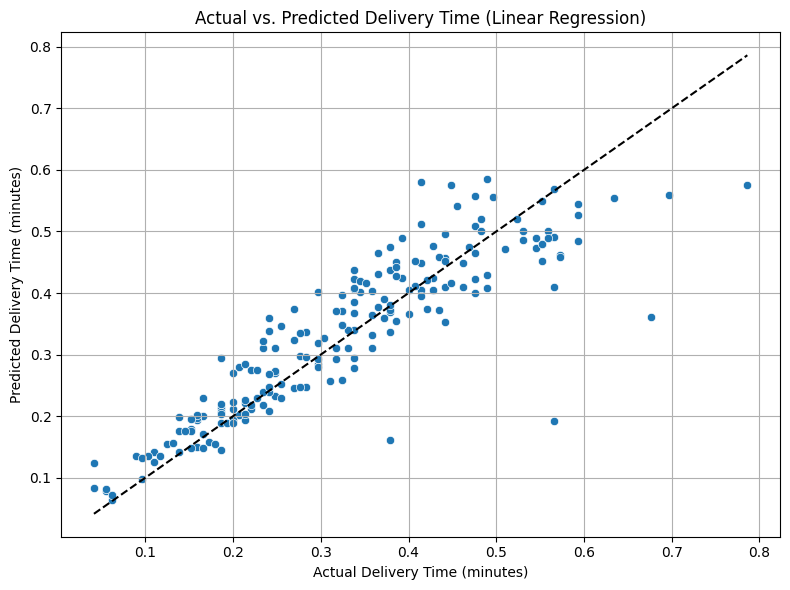

In [ ]:
# Menggunakan model terbaik (Linear Regression) untuk membuat prediksi pada data pengujian
y_pred_best = pipeline.predict(X_test)

# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Garis diagonal untuk prediksi sempurna
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.title('Actual vs. Predicted Delivery Time (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

lasso_params = {
    'regressor__alpha': [0.01, 0.1, 1, 10]
}

lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=3, scoring='r2')
lasso_grid.fit(X_train, y_train)

# Hasil Lasso
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)

In [ ]:
# Lasso
print("Lasso Regression:")
print(f"  Best Alpha: {lasso_grid.best_params_['regressor__alpha']}")
print(f"  MAE : {lasso_results['MAE']:.2f}")
print(f"  MSE : {lasso_results['MSE']:.2f}")
print(f"  RMSE: {lasso_results['RMSE']:.2f}")
print(f"  R2  : {lasso_results['R2']:.2f}\n")

Lasso Regression:
  Best Alpha: 0.01
  MAE : 0.04
  MSE : 0.00
  RMSE: 0.06
  R2  : 0.83



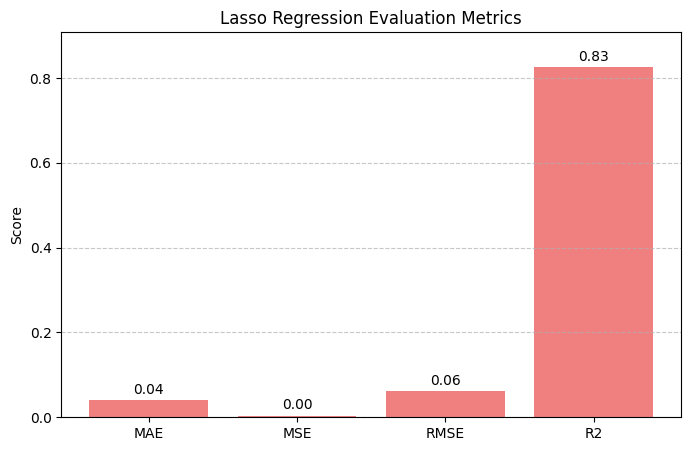

In [ ]:
# Data evaluasi Lasso Regression
metrics = lasso_results

# Membuat bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='lightcoral')

# Menambahkan nilai di atas setiap bar
for i, (key, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.01 * max(metrics.values()), f"{value:.2f}", ha='center', va='bottom')

plt.title('Lasso Regression Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, max(metrics.values()) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Buat pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Definisikan grid search parameter
ridge_params = {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Grid search
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Distance_km',
                                                                          'Preparation_Time_min',
                                                                          'Courier_Experience_yrs']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Weather',
                                                                          'Traffic_Level',
                                                                          'Time_of_Day',
                                                                          'Vehicle_Type'])])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Prediksi dan evaluasi
y_pred_ridge = ridge_grid.predict(X_test)
ridge_results = {
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'R2': r2_score(y_test, y_pred_ridge)
}

print("Best Alpha for Ridge:", ridge_grid.best_params_)

Best Alpha for Ridge: {'regressor__alpha': 10}


In [ ]:
# Ridge
print("Ridge Regression:")
print(f"  Best Alpha: {ridge_grid.best_params_['regressor__alpha']}")
print(f"  MAE : {ridge_results['MAE']:.2f}")
print(f"  MSE : {ridge_results['MSE']:.2f}")
print(f"  RMSE: {ridge_results['RMSE']:.2f}")
print(f"  R2  : {ridge_results['R2']:.2f}")

Ridge Regression:
  Best Alpha: 10
  MAE : 0.04
  MSE : 0.00
  RMSE: 0.06
  R2  : 0.82


In [ ]:
# Gunakan model terbaik untuk prediksi
y_pred_ridge = ridge_grid.predict(X_test)

# Evaluasi performa
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)

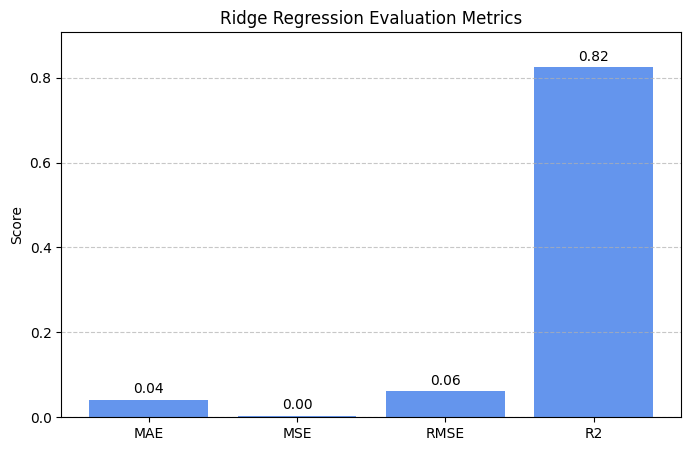

In [ ]:
# Data evaluasi Ridge Regression
ridge_metrics = ridge_results

# Membuat bar plot
plt.figure(figsize=(8, 5))
plt.bar(ridge_metrics.keys(), ridge_metrics.values(), color='cornflowerblue')

# Menambahkan nilai di atas bar
for i, (key, value) in enumerate(ridge_metrics.items()):
    plt.text(i, value + 0.01 * max(ridge_metrics.values()), f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.title('Ridge Regression Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, max(ridge_metrics.values()) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Parameter Grids
param_grids = {
    'Decision Tree': {
        'regressor__max_depth': [3, 5, 10, None],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5]
    },
    'XGBoost': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 10]
    }
}

In [ ]:
# Models with Preprocessing
tuned_results = {}
for name in ['Decision Tree', 'Random Forest', 'XGBoost']:
    pipeline = models[name]
    grid = GridSearchCV(pipeline, param_grids[name], cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

In [ ]:
# Output Hasil Tuning
for name, metrics in tuned_results.items():
    print(f"\nTuned Model: {name}")
    print(f"  Best Params: {metrics['Best Params']}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R2 Score: {metrics['R2']:.2f}")


Tuned Model: Decision Tree
  Best Params: {'regressor__max_depth': 3, 'regressor__min_samples_split': 2}
  MAE: 0.06
  RMSE: 0.08
  R2 Score: 0.67

Tuned Model: Random Forest
  Best Params: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
  MAE: 0.05
  RMSE: 0.07
  R2 Score: 0.79

Tuned Model: XGBoost
  Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
  MAE: 0.05
  RMSE: 0.07
  R2 Score: 0.80


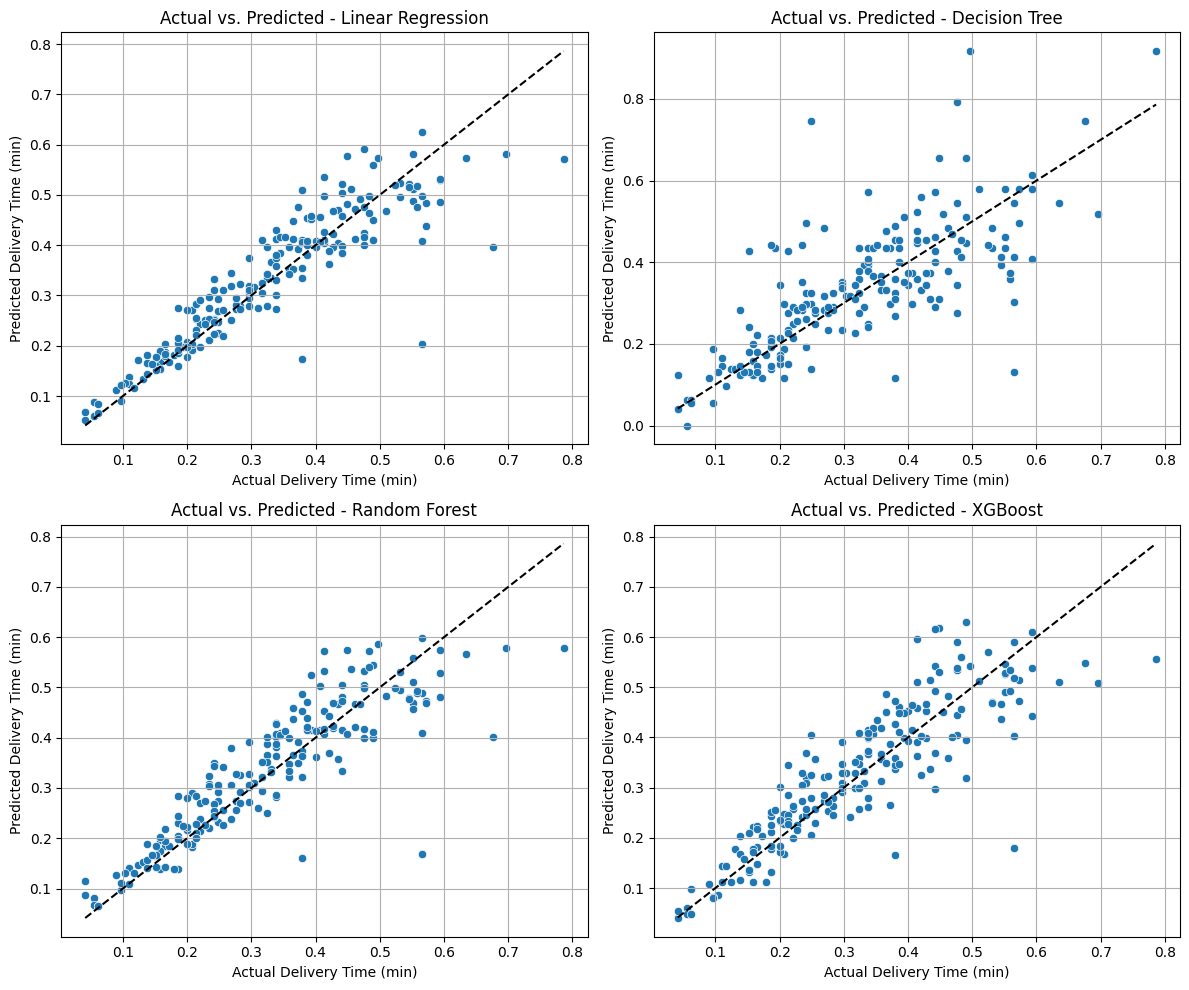

In [ ]:
# Create a figure for the scatter plots
plt.figure(figsize=(12, 10))
num_models = len(predictions)
num_cols = 2
num_rows = (num_models + num_cols - 1) // num_cols  # Calculate number of rows

# Create scatter plots for each model's predictions vs. actual values
i = 1
for name, y_pred in predictions.items():
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line
    plt.title(f'Actual vs. Predicted - {name}')
    plt.xlabel('Actual Delivery Time (min)')
    plt.ylabel('Predicted Delivery Time (min)')
    plt.grid(True)
    i += 1

plt.tight_layout()
plt.show()

##2. K-MEANS CLUSTERING

In [ ]:
#Numerical and Categorical Feature Identification
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

In [ ]:
#Creating a Preprocessor
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
#Selecting the Number of Clusters (K) using Elbow Method
wcss = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_init='auto', n_clusters=n_clusters, random_state=42)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('kmeans', kmeans)])
    pipeline.fit(df)
    wcss.append(pipeline.named_steps['kmeans'].inertia_)

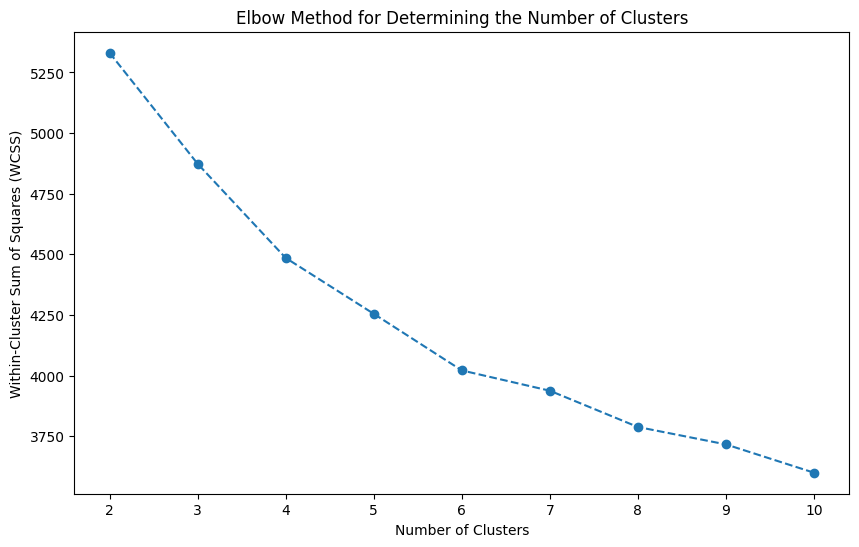

In [ ]:
# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Berdasarkan plot elbow, tentukan jumlah cluster yang optimal (misalnya, 3)
n_clusters = 3

In [ ]:
#Training K-Means Model with Selected Number of Clusters
kmeans = KMeans(n_init='auto', n_clusters=n_clusters, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', kmeans)])
pipeline.fit(df)

# Get the cluster label for each data point
labels = pipeline.predict(df)

# Add cluster labels to DataFrame
df['Cluster'] = labels

In [ ]:
#Analisis Cluster
print("\nJumlah Data Point per Cluster:")
print(df['Cluster'].value_counts())

print("\nRata-rata Fitur Numerik per Cluster:")
print(df.groupby('Cluster')[numerical_features].mean())

print("\nDistribusi Fitur Kategorikal per Cluster:")
for col in categorical_features:
    print(f"\nDistribusi untuk fitur '{col}':")
    print(df.groupby('Cluster')[col].value_counts(normalize=True))


Jumlah Data Point per Cluster:
Cluster
2    397
1    330
0    273
Name: count, dtype: int64

Rata-rata Fitur Numerik per Cluster:
         Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
Cluster                                                              
0           0.271261              0.770604                0.464387   
1           0.318066              0.232576                0.562626   
2           0.778657              0.534320                0.506577   

         Delivery_Time_min  
Cluster                     
0                 0.283390  
1                 0.208485  
2                 0.478381  

Distribusi Fitur Kategorikal per Cluster:

Distribusi untuk fitur 'Weather':
Cluster  Weather
0        Clear      0.509158
         Rainy      0.208791
         Foggy      0.120879
         Snowy      0.087912
         Windy      0.073260
1        Clear      0.545455
         Rainy      0.184848
         Windy      0.115152
         Foggy      0.096970
         Snowy   

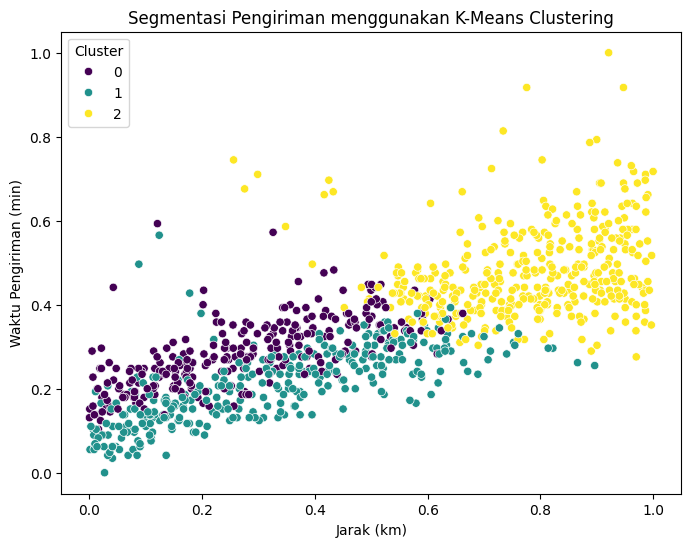

In [ ]:
# 6. Visualisasi Cluster (Contoh untuk dua fitur numerik)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min', hue='Cluster', palette='viridis')
plt.title('Segmentasi Pengiriman menggunakan K-Means Clustering')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Pengiriman (min)')
plt.show()